[![brightonr-banner-logo](images/notebanner.png)](https://www.meetup.com/en-AU/Silicon-Brighton-Brighton-R/)

<div style = "text-align: right"><font size = 5 color = "#0077be" face = "verdana"><b>AutoGluon - Get on the AutoML-wagon</b></font></div>
<div style = "text-align: right"><font><i>By 'Dayo Oguntoyinbo</i></font></div>
<div style = "text-align: right"><font>28th April 2022</font></div>

We will be using the Quick Start from the official documentation - https://auto.gluon.ai/stable/index.html

In [2]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning) 

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# AutoGluon Object Detection - Prepare Dataset for Object Detector

https://auto.gluon.ai/stable/tutorials/object_detection/index.html

In [3]:
# !pip install -Uq pip
# !pip install -Uq setuptools wheel

In [4]:
# # CPU version of pytorch has smaller footprint - see installation instructions in
# # pytorch documentation - https://pytorch.org/get-started/locally/
# !pip install -Uq torch==1.10.1+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html
# !pip install -Uq autogluon

In [5]:
%matplotlib inline
import autogluon.core as ag
from autogluon.vision import ObjectDetector

## Load an existing object detection dataset

Pascal VOC and MS COCO are two most popular data format for object detection. Most public available object detection datasets follow either one of these two formats. In this tutorial we will not touch the details. You may view the original introduction for VOC and COCO.

To distinguish these two formats, you can either refer to the labeling tool or check the folder structure. Usually annotations in VOC format are individual xml files, while COCO format use a single json file to store all annotations.

In [6]:
url = 'https://autogluon.s3.amazonaws.com/datasets/tiny_motorbike.zip'
dataset_train = ObjectDetector.Dataset.from_voc(url, splits='trainval')

# or load from coco format, skip as it's too big to download
# dataset_train = ObjectDetector.Dataset.from_coco(annotation_json_file, root='/path/to/root')

21273KB [00:02, 9191.67KB/s]                            


tiny_motorbike/
├── Annotations/
├── ImageSets/
└── JPEGImages/


## Manually convert any format to autogluon object detector dataset

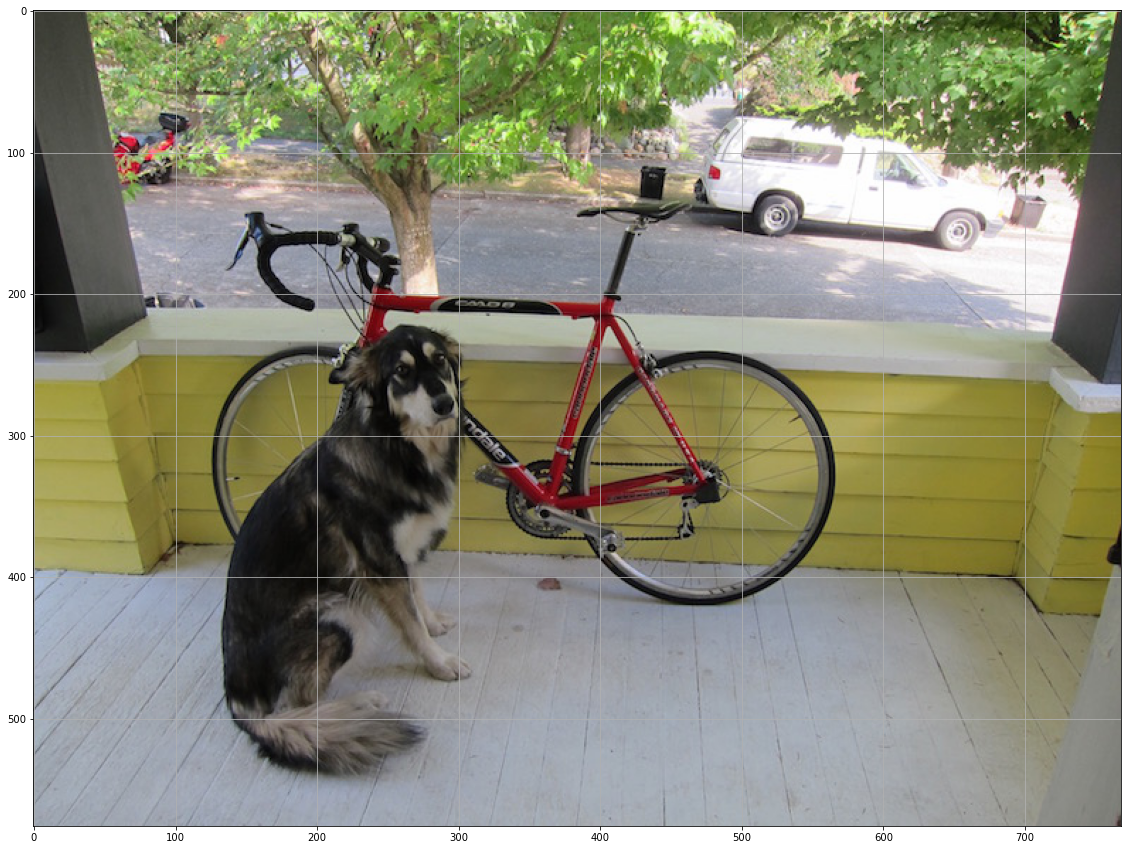

In [12]:
ag.utils.download('https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg', path='dog.jpg')

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('dog.jpg')
plt.figure(figsize=(20, 15))
imgplot = plt.imshow(img)

plt.grid()
plt.show()

With the grid on, we can roughly annotate this image like this:

In [13]:
import pandas as pd

class NaiveDetectionGT:
    def __init__(self, image):
        self._objects = []
        self.image = image
        img = mpimg.imread('dog.jpg')
        self.w = img.shape[1]
        self.h = img.shape[0]

    def add_object(self, name, xmin, ymin, xmax, ymax, difficult=0):
        self._objects.append({'image': self.image, 'class': name,
                              'xmin': xmin / self.w, 'ymin': ymin / self.h,
                              'xmax': xmax / self.w, 'ymax': ymax / self.h, 'difficult': difficult})

    @property
    def df(self):
        return pd.DataFrame(self._objects)

gt = NaiveDetectionGT('dog.jpg')
gt.add_object('dog', 140, 220, 300, 540)
gt.add_object('bicycle', 120, 140, 580, 420)
gt.add_object('car', 460, 70, 680, 170)
df = gt.df

In [14]:
df

,image,class,xmin,ymin,xmax,ymax,difficult
0,dog.jpg,dog,0.18,0.38,0.39,0.94,0
1,dog.jpg,bicycle,0.16,0.24,0.76,0.73,0
2,dog.jpg,car,0.60,0.12,0.89,0.30,0


The `df` is a valid dataset and can be used by `ObjectDetector.fit` function. Internally, it will be converted to object detection dataset, or you can manually convert it.

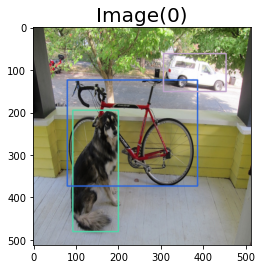

In [15]:
dataset = ObjectDetector.Dataset(df, classes=df['class'].unique().tolist())
dataset.show_images(nsample=1, ncol=1)

For more on this, please see the `Object Detection` - Quick Start to start training the `ObjectDetector`.

https://auto.gluon.ai/stable/tutorials/object_detection/beginner.html